# Demand Forecasting for Nordstrom


## Initializing Data

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading Data
df = pd.read_csv("Historical Product Demand.csv", parse_dates=['Date'])
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [4]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1048575 non-null  object        
 1   Warehouse         1048575 non-null  object        
 2   Product_Category  1048575 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1048575 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 40.0+ MB


In [5]:
# Checking the shape of the dataframe
df.shape

(1048575, 5)

In [6]:
# Checking for missing values
df.isnull().sum()
# It looks like it has a lot of missing values in the date column

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

### Handling missing values

In [7]:
# Checking the missing values
df.isnull().sum().sum()/len(df)

0.010718355863910546

#### The missing value accounts to just 1% of the whole data, so we can remove these entries

In [8]:
df.dropna(axis=0, inplace=True)


In [9]:
# Resetting index as date
df.reset_index(drop=True)
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [10]:
df.sort_values('Date')[0:20]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,(2)
131429,Product_0412,Whse_S,Category_007,2011-10-20,(2)


In [11]:
# since demand values has brackets around them, so we should clean them first
df['Order_Demand'] =df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] =df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] =df['Order_Demand'].astype('int64')
df.sort_values('Date')[0:20]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,2
131429,Product_0412,Whse_S,Category_007,2011-10-20,2


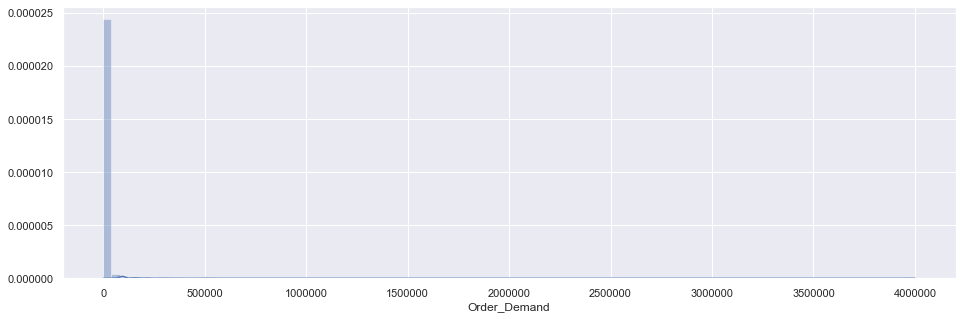

In [12]:
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df['Order_Demand'], bins = 100);

In [13]:
df.groupby('Warehouse')['Order_Demand'].sum().sort_values(ascending=False)

Warehouse
Whse_J    3363200396
Whse_S    1038024700
Whse_C     585071404
Whse_A     147877431
Name: Order_Demand, dtype: int64

In [14]:
# Warehouse J has the maximum demand
df1 = pd.DataFrame(df.groupby('Product_Category')['Order_Demand'].sum().sort_values(ascending=False))
df1["% Contribution"] = df1['Order_Demand']/df1['Order_Demand'].sum()*100
df1
# Here the first fout categories contribute to more than 90% of the total demand

,Order_Demand,% Contribution
Product_Category,,
Category_019,4240159257,82.586981
Category_006,405571330,7.899447
Category_005,199674520,3.889127
Category_007,128691531,2.506567
Category_028,49055354,0.955467
Category_033,42610000,0.829929
Category_030,40966555,0.797919
Category_021,4480570,0.087270
Category_032,4473048,0.087123


In [17]:
df2 = pd.pivot_table(df,index=["Date"],values=["Order_Demand"],columns=["Product_Category"],aggfunc=np.sum)
df2.columns = df2.columns.droplevel(0)
df2["Category_019"].dropna()
# This gives the daily demand of Category_019

Date
2011-06-24     92000.0
2011-09-02      1250.0
2011-10-31         3.0
2011-11-24     40000.0
2011-11-25     17250.0
                ...   
2016-12-30    621700.0
2017-01-04     19000.0
2017-01-05     18800.0
2017-01-06    169000.0
2017-01-09      4000.0
Name: Category_019, Length: 1606, dtype: float64

In [18]:
y = df2.resample('M').sum() # Resampling the data on monthly basis 
y.index.freq = "M" # Setting datetime frequency to Month
y.head(20)
# In Year 2011 so much data is missing, so we will exlude it 

Product_Category,Category_001,Category_002,Category_003,Category_004,Category_005,Category_006,Category_007,Category_008,Category_009,Category_010,...,Category_024,Category_025,Category_026,Category_027,Category_028,Category_029,Category_030,Category_031,Category_032,Category_033
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-05-31,0.0,0.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-09-30,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_019 = pd.DataFrame(y["Category_019"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_019.head()

,Category_019
Date,
2012-01-31,61243661.0
2012-02-29,72219508.0
2012-03-31,72444888.0
2012-04-30,61382420.0
2012-05-31,72041920.0


In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

span = 4
alpha = 2/(span+1)
df_019['EWMA4'] = df_019["Category_019"].ewm(alpha=alpha,adjust=False).mean() # Simple Weighted Moving Average
# Simple Exponentional Smoothing
df_019['SES4']=SimpleExpSmoothing(df_019["Category_019"]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

#Double Exponentional  Smothening
df_019['DESadd4'] = ExponentialSmoothing(df_019["Category_019"], trend='add').fit().fittedvalues.shift(-1)

C:\Users\Ajay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


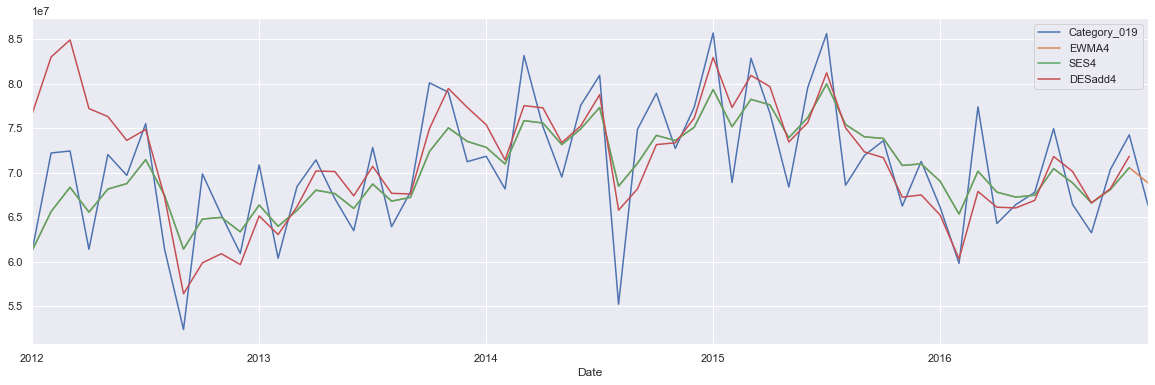

In [22]:
df_019[["Category_019",'EWMA4','SES4','DESadd4']].plot(figsize = (20,6)) # Plot for Weighted Moving average, simple exponential smoothing & Double Exponentional, 
#It can be seen data has some seasonailty, therefore will use ARIMA, ARMA

In [23]:
# Will Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

In [24]:
# to Check series is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [25]:
adf_test(df_019["Category_019"])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.348972
p-value                  0.606480
# lags used              7.000000
# observations          52.000000
critical value (1%)     -3.562879
critical value (5%)     -2.918973
critical value (10%)    -2.597393
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [26]:
fit = auto_arima(df_019["Category_019"], start_p=1, start_q=1,
                          max_p=5, max_q=5, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1642.019, Time=0.74 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1645.349, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1645.479, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1640.900, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1648.063, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1638.407, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1640.385, Time=0.90 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1638.947, Time=0.37 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1639.546, Time=0.80 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1634.433, Time=0.59 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1636.208, Time=0.19 sec
 ARIMA(0,1,2)(1,1,2)[12]             : AIC=1636.430, Time=1.50 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,2)(0,1,2)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -806.204
Date:                            Sun, 14 Feb 2021   AIC                           1626.408
Time:                                    14:23:40   BIC                           1639.359
Sample:                                         0   HQIC                          1631.281
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0998      0.073    -15.151      0.000      -1.242      -0.958
ar.L2         -0.9551      0.059    -16.184      0.000      -1.071      -0.839
ma.L1          1.1458      0.110     10.378      0.000       0.929       1.362
ma.L2          0.8111      0.138      5.856      0.000       0.540       1.083
ma.S.L12      -0.5001      0.230     -2.174      0.030      -0.951      -0.049
ma.S.L24      -0.1924      0.113     -1.704      0.088      -0.414       0.029
sigma2      4.516e+13   1.55e-15   2.92e+28      0.000    4.52e+13    4.52e+13
===================================================================================
Ljung-Box (Q):                       45.13   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.27   Prob(JB):                         0.40
Heteroskedasticity (H):               1.26   Skew:                            -0.47
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.92e+44. Standard errors may be unstable.
"""

In [27]:
len(df_019["Category_019"])
# Train & Test Data
train = df_019["Category_019"].iloc[:48]
test = df_019["Category_019"].iloc[48:]

In [28]:
model = SARIMAX(train,order=(2,1,2),seasonal_order=(0,1,2,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Category_019   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -597.849
Date:                            Sun, 14 Feb 2021   AIC                           1209.697
Time:                                    14:27:18   BIC                           1220.585
Sample:                                01-31-2012   HQIC                          1213.456
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0278      0.069    -14.963      0.000      -1.162      -0.893
ar.L2         -0.9479      0.066    -14.407      0.000      -1.077      -0.819
ma.L1          1.2018      0.122      9.823      0.000       0.962       1.442
ma.L2          0.8850      0.132      6.709      0.000       0.626       1.144
ma.S.L12      -0.5616      0.382     -1.469      0.142      -1.311       0.188
ma.S.L24      -0.2223      0.145     -1.531      0.126      -0.507       0.062
sigma2      4.453e+13   9.44e-15   4.72e+27      0.000    4.45e+13    4.45e+13
===================================================================================
Ljung-Box (Q):                       38.22   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.28   Prob(JB):                         0.60
Heteroskedasticity (H):               0.56   Skew:                            -0.41
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.04e+43. Standard errors may be unstable.
"""

In [29]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA (2,1,2),(0,1,2,12) Predictions')

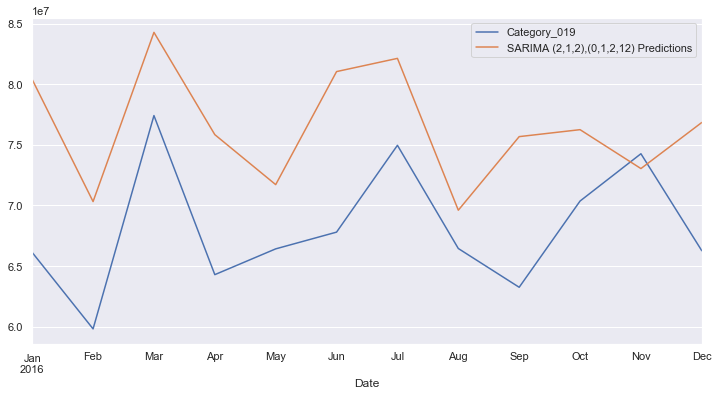

In [30]:
ax = test.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [32]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(test, predictions))
print(f'SARIMA(2,1,2)(0,1,2,12) RMSE Error: {error:11.10}')
print('Std of Test data:                  ', df_019["Category_019"].std())
# Comparison of RMSE & Std of data, as Std if very high compared to RMSE

SARIMA(2,1,2)(0,1,2,12) RMSE Error: 9409713.959
Std of Test data:                   7124982.427046787


In [33]:
# Retrain the model on the full data, and forecasting for next 4 months
model = SARIMAX(df_019["Category_019"],order=(2,1,2),seasonal_order=(0,1,2,12))
results = model.fit()
fcast = results.predict(len(df_019["Category_019"]),len(df_019["Category_019"])+4,typ='levels').rename('SARIMA(2,1,2)(0,1,2,12) Forecast')

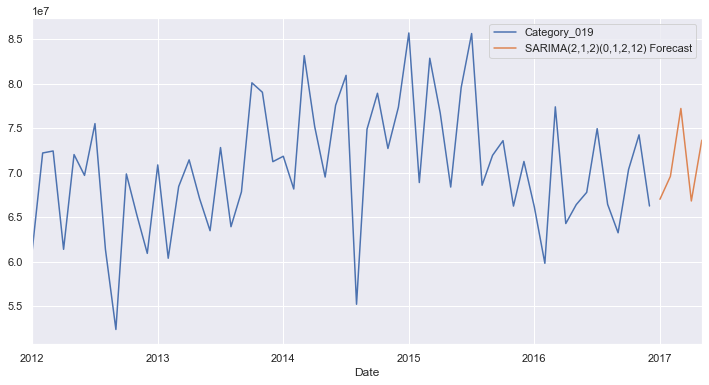

In [34]:
ax = df_019["Category_019"].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#plotting actual data & 4 month forecasted demand